<a href="https://colab.research.google.com/github/KrishO9/makemore/blob/main/makemore2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!git clone https://github.com/karpathy/makemore.git

Cloning into 'makemore'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 64 (delta 20), reused 15 (delta 15), pack-reused 21 (from 1)
Receiving objects: 100% (64/64), 123.28 KiB | 1.69 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [4]:
words = open('makemore/names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [5]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']= 0
itos = {i:s for s, i in stoi.items()}

In [7]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [50]:
block_size = 3 # the context length (we will consider previous three character to predic the next one)\

X , Y = [] , []
for w in words:

  # print(w)
  context = [0] * block_size
  for ch in w+'.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)

    # print(''.join(itos[i] for i in context), '-->', itos[ix])
    context = context[1:] + [ix] # cropped and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [51]:
X.shape, X.dtype, Y.shape, Y.dtype
# Using 5 words we made 32 data samples 32*3
# Label is the index of the predicted word

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [10]:
# In the paper they made a lookup table for 17000 words
# They took a 30 dimensional space to calculate the embeddings of these words
#For simplicity , we are taking a 2 dimensional space for 27 letters

C = torch.randn((27,2))

In [11]:
C[3]

tensor([1.2491, 0.1893])

In [12]:
F.one_hot(torch.tensor(5), num_classes = 27)
# We won't be using one hot encoding as index will be faster here

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [13]:
C[X].shape

torch.Size([32, 3, 2])

In [14]:
X[13,2]

tensor(1)

In [15]:
C[X][13,2]

tensor([0.5222, 0.1727])

In [16]:
C[1]

tensor([0.5222, 0.1727])

In [17]:
# We have 2 dimesional embeddings for each letter and each predictions depends
# on previous three words
# So we need total of 6 neurons in the input layer
# lets take the neurons in the hidden layer as 100

In [18]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [19]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [20]:
emb @ W1 +b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

In [21]:
torch.cat(torch.unbind(emb,1), 1).shape
#This is comparatively less efficient than view
#because it creates a new tensor while .view() manipulates the internal attributes of the same stored tensor

torch.Size([32, 6])

In [22]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [23]:
a.shape

torch.Size([18])

In [24]:
a.view(3,3,2)
#some of the internal attributes of the view is chnaged and manipulated

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [25]:
a.storage()

/tmp/ipython-input-214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [26]:
emb.shape

torch.Size([32, 3, 2])

In [27]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [28]:
# If we simply do this , it will work

h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)
#or we can also keep h = emb.view(-1,6) @ W1 + b1
# in this case pytorch will automatically infer it to for a valid matrix multiplication

In [29]:
h
#all values are now in between -1 and 1

tensor([[-0.7268, -0.9992, -0.9605,  ..., -0.4064,  0.9492, -0.9018],
        [ 0.3704, -0.9986,  0.9154,  ..., -0.4562,  0.9992,  0.4669],
        [ 0.9650, -0.8213,  0.2309,  ..., -0.6129,  0.9988,  0.7376],
        ...,
        [ 0.5693, -0.9997,  0.9989,  ...,  0.9995,  1.0000,  0.9989],
        [ 0.9863,  0.0710,  1.0000,  ...,  0.9999,  0.9998,  0.1970],
        [-0.9014,  0.9869,  0.9999,  ...,  0.8831, -0.5966,  0.9268]])

In [30]:
h.shape

torch.Size([32, 100])

In [31]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [32]:
logits = h @ W2 + b2

In [33]:
logits.shape

torch.Size([32, 27])

In [34]:
counts = logits.exp()

In [35]:
prob = counts / counts.sum(1, keepdims = True)

In [36]:
prob.shape

torch.Size([32, 27])

In [37]:
prob[0].sum()

tensor(1.0000)

In [38]:
prob[torch.arange(32), Y]
#trying to iterate the rows and get the predicted probability of the letter which was the actual prediction

tensor([7.5478e-02, 1.0124e-06, 2.8672e-08, 5.5058e-08, 9.8913e-09, 5.3708e-11,
        1.5221e-13, 4.1595e-08, 4.6809e-08, 1.1943e-09, 5.1174e-11, 1.2771e-05,
        2.0805e-02, 1.1460e-03, 5.2712e-02, 2.5285e-06, 5.8999e-06, 8.7795e-14,
        2.6198e-01, 4.2203e-04, 2.5570e-08, 4.6022e-07, 1.8643e-12, 1.9338e-09,
        4.9832e-04, 4.8031e-10, 7.4355e-12, 4.4651e-06, 6.4553e-07, 1.5538e-05,
        6.4619e-08, 5.2945e-08])

In [39]:
# We will take the negative log likelihood to signify the loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.4349)

Summary

In [40]:
#dataset
X.shape , Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [103]:
#Splitting the dataset into train, dev/validation and test
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [141]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g) #embeddings
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [142]:
sum(p.nelement() for p in parameters)
#Total parameters

11897

In [143]:
for p in parameters:
  p.requires_grad=True

In [144]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [145]:
lri = []
lossi = []
stepsi = []

In [158]:
for i in range(30000):

  #mini batch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  #forward pass
  emb = C[Xtr[ix]] # (32,6)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  stepsi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.4754130840301514


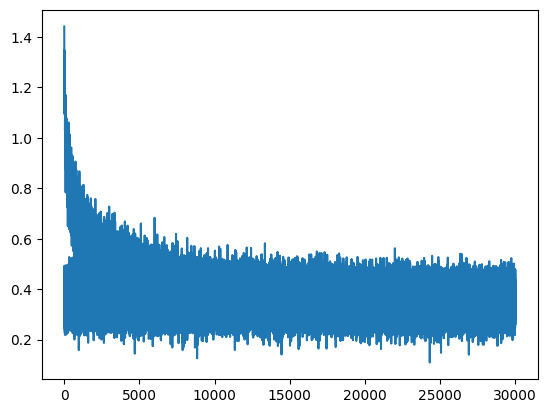

In [159]:
plt.plot(stepsi,lossi)

In [160]:
  #Validation loss
  emb = C[Xdev] # (32,6)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Ydev)
  loss.item()

2.2351932525634766

In [161]:
  #training loss
  emb = C[Xtr] # (32,6)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Ytr)
  loss.item()

2.2002809047698975

In [48]:
# WE can clearly see that there are multiple predictions for the  same trigram...

In [54]:
#making mini batches to implement mini-batch gradient descent
torch.randint(0,X.shape[0],(32,))

tensor([ 66427, 196930, 184506,   2619, 116889,  33232, 138936,  80666,  98467,
        191970, 213170, 222504,  25683,  62585, 167649, 184061, 126107, 132330,
        103892, 160919, 163803,   5101,  61990, 112373, 151596,  32552,  26413,
         35957, 160578, 146052, 172008, 174683])

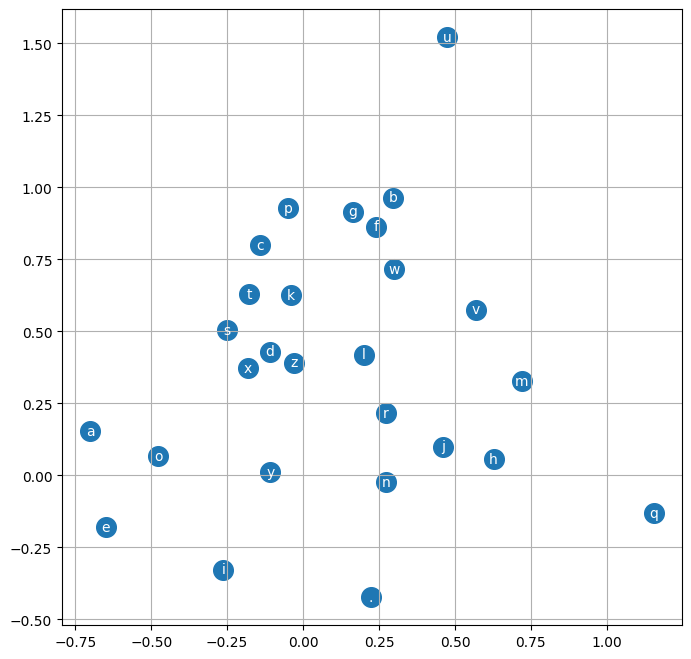

In [123]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')